In [2]:
import pandas as pd

course_name = ['Data Science', 'Machine Learning', 'Big Data', 'Data Engineer']
duration = [2, 3, 6, 4]
df = pd.DataFrame(data={'course_name': course_name, 'duration': duration})

Q1

In [3]:
second_row = df.iloc[1]
print(second_row)

course_name    Machine Learning
duration                      3
Name: 1, dtype: object


Q2

iloc: Selects rows/columns by integer index positions (zero-based).

loc: Selects rows/columns by labels (or index names).

Q3

In [5]:
reindex = [3, 0, 1, 2]
new_df = df.reindex(reindex)
print(new_df)

        course_name  duration
3     Data Engineer         4
0      Data Science         2
1  Machine Learning         3
2          Big Data         6


In [7]:
print("Loc:\n", new_df.loc[2])
print("\nIloc:\n", new_df.iloc[2])

Loc:
 course_name    Big Data
duration              6
Name: 2, dtype: object

Iloc:
 course_name    Machine Learning
duration                      3
Name: 1, dtype: object


In [8]:
import pandas as pd
import numpy as np
columns = ['column_1', 'column_2', 'column_3', 'column_4', 'column_5', 'column_6']
indices = [1,2,3,4,5,6]
#Creating a dataframe:
df1 = pd.DataFrame(np.random.rand(6,6), columns = columns, index = indices)

Q4

In [10]:
column_means = df1.mean()
column_means

column_1    0.377908
column_2    0.427478
column_3    0.331460
column_4    0.509854
column_5    0.471984
column_6    0.445237
dtype: float64

In [12]:
std_column_2 = df1['column_2'].std()
std_column_2

0.23294584716964406

Q5

In [14]:
df1.loc[2, 'column_2'] = 'string_value'
print(df1)

   column_1      column_2  column_3  column_4  column_5  column_6
1  0.012369      0.389145  0.026752  0.971592  0.615779  0.279156
2  0.623973  string_value  0.200409  0.435158  0.514462  0.639722
3  0.023462      0.356969  0.766702  0.161010  0.347355  0.929518
4  0.788898      0.059149  0.111448  0.367132  0.097302  0.293154
5  0.289191      0.609982  0.211106  0.453120  0.833900  0.448340
6  0.529557      0.412807  0.672343  0.671115  0.423109  0.081531


In [15]:
try:
    mean_column_2 = df1['column_2'].mean()
    print(mean_column_2)
except Exception as e:
    print(e)

unsupported operand type(s) for +: 'float' and 'str'


After replacing a numerical value with a string, the column_2 data type changes to object. Pandas cannot calculate the mean of mixed data types (numerical and string).

Attempting to calculate the mean of such a column will raise a TypeError, as strings cannot be included in numerical operations.

Q6

A window function in Pandas refers to operations that are applied over a sliding or rolling window of rows or time periods in a DataFrame or Series. These functions help compute aggregate values, trends, or summaries over a specific "window size."

Types of Windows Functions in Pandas:
Rolling Window: Used to calculate a rolling statistic, like a moving average or sum.

Expanding Window: Includes all rows from the start of the data up to the current point.

Exponentially Weighted Window: Assigns exponentially decreasing weights to older observations.

Aggregate Window Functions: Allows custom aggregation functions like sum, mean, std, etc., to be applied over windows.

Time-Based Windows: Used with time series data to group and aggregate over time periods (e.g., days, weeks).

Q7

In [17]:
import pandas as pd

current_date = pd.Timestamp.now()
current_month = current_date.month
current_year = current_date.year

print("Current Month:", current_month)
print("Current Year:", current_year)

Current Month: 12
Current Year: 2024


Q8

In [18]:
import pandas as pd

def calculate_date_difference():
    date1 = input("Enter the first date (YYYY-MM-DD): ")
    date2 = input("Enter the second date (YYYY-MM-DD): ")

    date1 = pd.Timestamp(date1)
    date2 = pd.Timestamp(date2)

    time_delta = abs(date2 - date1)

    days = time_delta.days
    seconds = time_delta.total_seconds()
    hours = seconds // 3600
    minutes = (seconds % 3600) // 60

    print(f"\nDifference between the two dates:")
    print(f"Days: {days}")
    print(f"Hours: {int(hours)}")
    print(f"Minutes: {int(minutes)}")

calculate_date_difference()


Difference between the two dates:
Days: 16102
Hours: 386448
Minutes: 0


Q9

In [25]:
import pandas as pd

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Category': ['Medium', 'Low', 'High', 'Medium']
}
df = pd.DataFrame(data)
df.to_csv('sample_data.csv', index=False)

df = pd.read_csv('sample_data.csv')
category_order = ['Low', 'Medium', 'High']
df['Category'] = pd.Categorical(df['Category'], categories=category_order, ordered=True)
sorted_df = df.sort_values(by='Category')
print(sorted_df)

      Name Category
1      Bob      Low
0    Alice   Medium
3    David   Medium
2  Charlie     High


Q10

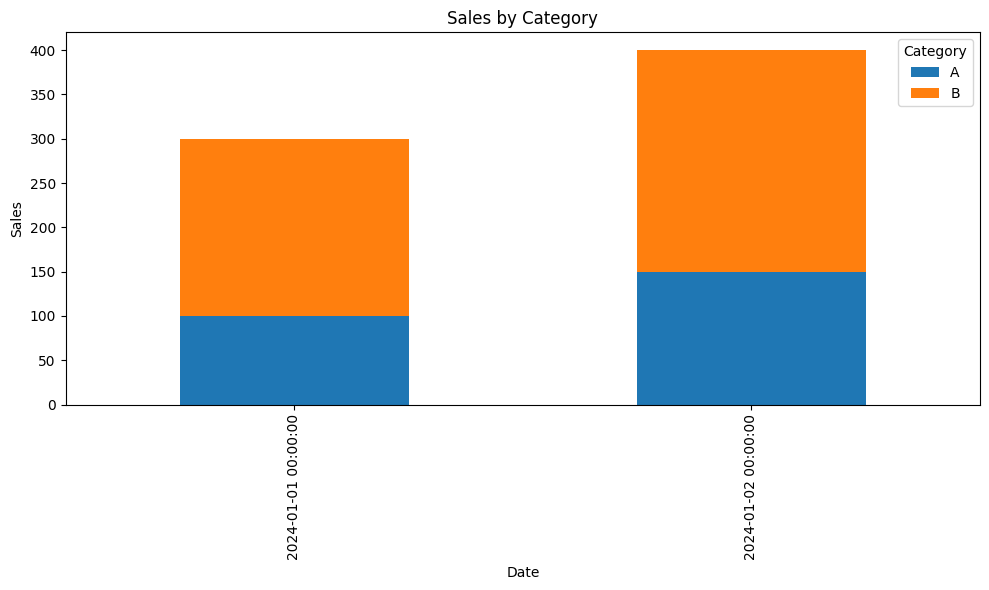

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-01', '2024-01-02'],
    'Product_Category': ['A', 'A', 'B', 'B'],
    'Sales': [100, 150, 200, 250]
}
df = pd.DataFrame(data)
df.to_csv('sales_data.csv', index=False)

df = pd.read_csv('sales_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
sales_data = df.groupby(['Date', 'Product_Category'])['Sales'].sum().unstack(fill_value=0)
sales_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Sales by Category")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(title="Category")
plt.tight_layout()
plt.show()

Q11

In [28]:
import pandas as pd
from prettytable import PrettyTable

data = {
    'Student ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Test Score': [85, 90, 80, 75, 85, 82, 78, 85, 90, 85]
}
df = pd.DataFrame(data)
df.to_csv('student_data.csv', index=False)

df = pd.read_csv('student_data.csv')

mean = df['Test Score'].mean()
median = df['Test Score'].median()
mode = ', '.join(map(str, df['Test Score'].mode().tolist()))

table = PrettyTable()
table.field_names = ["Statistic", "Value"]
table.add_row(["Mean", round(mean, 2)])
table.add_row(["Median", median])
table.add_row(["Mode", mode])

print(table)

+-----------+-------+
| Statistic | Value |
+-----------+-------+
|    Mean   |  83.5 |
|   Median  |  85.0 |
|    Mode   |   85  |
+-----------+-------+
